# Arquivo utilizado para as observações realizadas durante o processo de estudo do dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [6]:

df.iloc[30:41][["Name", "Platform", "Global_Sales"]]

,Name,Platform,Global_Sales
30,Pokémon Yellow: Special Pikachu Edition,GB,14.64
31,Call of Duty: Black Ops 3,PS4,14.63
32,Call of Duty: Black Ops,X360,14.61
33,Pokemon X/Pokemon Y,3DS,14.60
34,Call of Duty: Black Ops II,PS3,13.79
35,Call of Duty: Black Ops II,X360,13.67
36,Call of Duty: Modern Warfare 2,X360,13.47
37,Call of Duty: Modern Warfare 3,PS3,13.32
38,Grand Theft Auto III,PS2,13.10
39,Super Smash Bros. Brawl,Wii,12.84


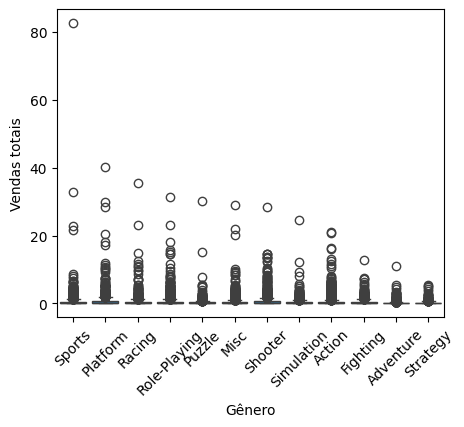

In [4]:
dffi = df.copy()

plt.figure(figsize=(5, 4))
sns.boxplot(x='Genre', y='Global_Sales', data=dffi)
      
plt.title('')
plt.xlabel('Gênero')
plt.ylabel('Vendas totais')
plt.xticks(rotation=45)
    
plt.show()

In [5]:
# Remove outliers
Q1 = df['Global_Sales'].quantile(0.00)
Q3 = df['Global_Sales'].quantile(0.98)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

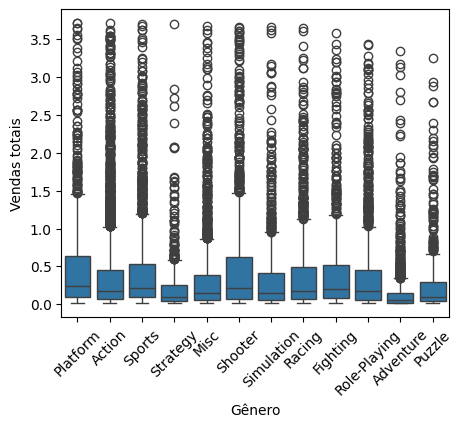

In [6]:
dffi = df.copy()

plt.figure(figsize=(5, 4))
sns.boxplot(x='Genre', y='Global_Sales', data=dffi)
      
plt.title('')
plt.xlabel('Gênero')
plt.ylabel('Vendas totais')
plt.xticks(rotation=45)
    
plt.show()

In [7]:
# Cria coluna com a região que mais vendeu

column_to_number = {
    'NA_Sales':    "NA",
    'EU_Sales':    "EU",
    'JP_Sales':    "JP",
    'Other_Sales': "Outro" 
}

subset = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df['Greatest'] = df[subset].idxmax(axis=1).map(column_to_number)

df[ subset + ["Greatest"] ].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Greatest
335,1.95,0.86,0.59,0.31,NA
336,1.93,1.58,0.00,0.19,NA
337,1.33,1.68,0.13,0.57,EU
338,0.58,2.48,0.04,0.59,EU
339,1.49,0.73,1.38,0.10,NA


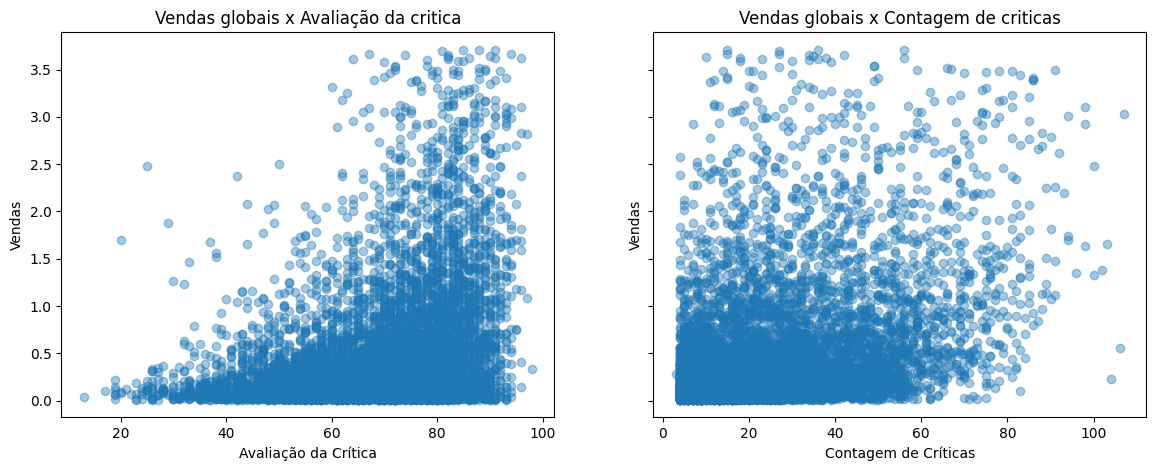

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

df_fi = df.copy()
df_fi = df.copy()
df_fi = df_fi[ df_fi["Global_Sales"] > 0 ]

axes[0].set_title('Vendas globais x Avaliação da critica')
axes[0].scatter( 
  df_fi['Critic_Score'],
  df_fi['Global_Sales'],
  alpha=.4
)

axes[0].set_xlabel('Avaliação da Crítica')
axes[0].set_ylabel('Vendas')

axes[1].set_title('Vendas globais x Contagem de criticas')
axes[1].scatter( 
  df_fi['Critic_Count'],
  df_fi['Global_Sales'],
  alpha=.4
)

axes[1].set_xlabel('Contagem de Críticas')
axes[1].set_ylabel('Vendas')

plt.show()

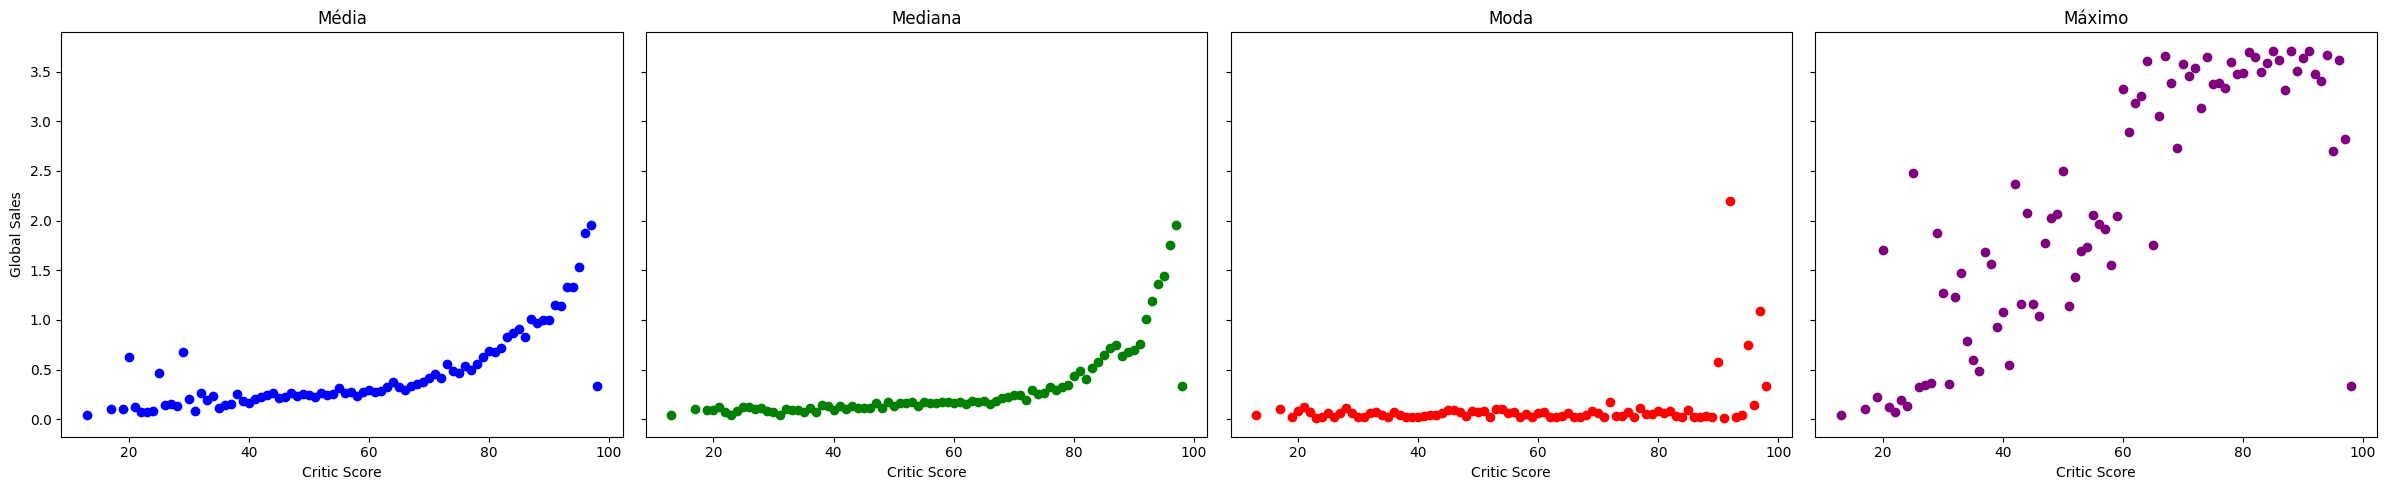

In [9]:
media =   df_fi.groupby('Critic_Score')['Global_Sales'].mean().reset_index()
mediana = df_fi.groupby('Critic_Score')['Global_Sales'].median().reset_index()
moda =   df_fi.groupby('Critic_Score')['Global_Sales'].apply(lambda x: x.mode().iloc[0]).reset_index()
maxi =    df_fi.groupby('Critic_Score')['Global_Sales'].max().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=True)

axes[0].scatter(media['Critic_Score'], media['Global_Sales'], color='blue')
axes[0].set_title('Média')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Global Sales')

axes[1].scatter(mediana['Critic_Score'], mediana['Global_Sales'], color='green')
axes[1].set_title('Mediana')
axes[1].set_xlabel('Critic Score')

axes[2].scatter(moda['Critic_Score'], moda['Global_Sales'], color='red')
axes[2].set_title('Moda')
axes[2].set_xlabel('Critic Score')

axes[3].scatter(maxi['Critic_Score'], maxi['Global_Sales'], color='purple')
axes[3].set_title('Máximo')
axes[3].set_xlabel('Critic Score')

# Display the plots
plt.tight_layout()
plt.show()

/tmp/ipykernel_22575/3479053195.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


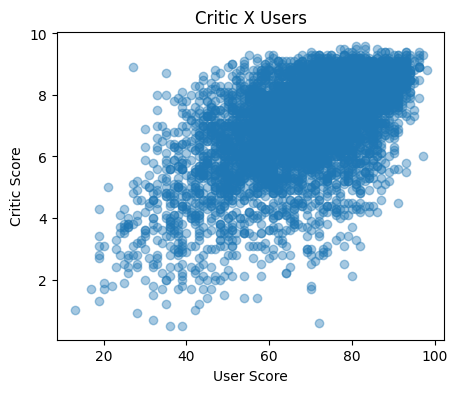

In [10]:
fdf = df

plt.figure(figsize=(5, 4))
plt.scatter( 
  fdf['Critic_Score'],
  fdf['User_Score'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Critic Score')
plt.xlabel('User Score')

plt.title('Critic X Users')

plt.show()

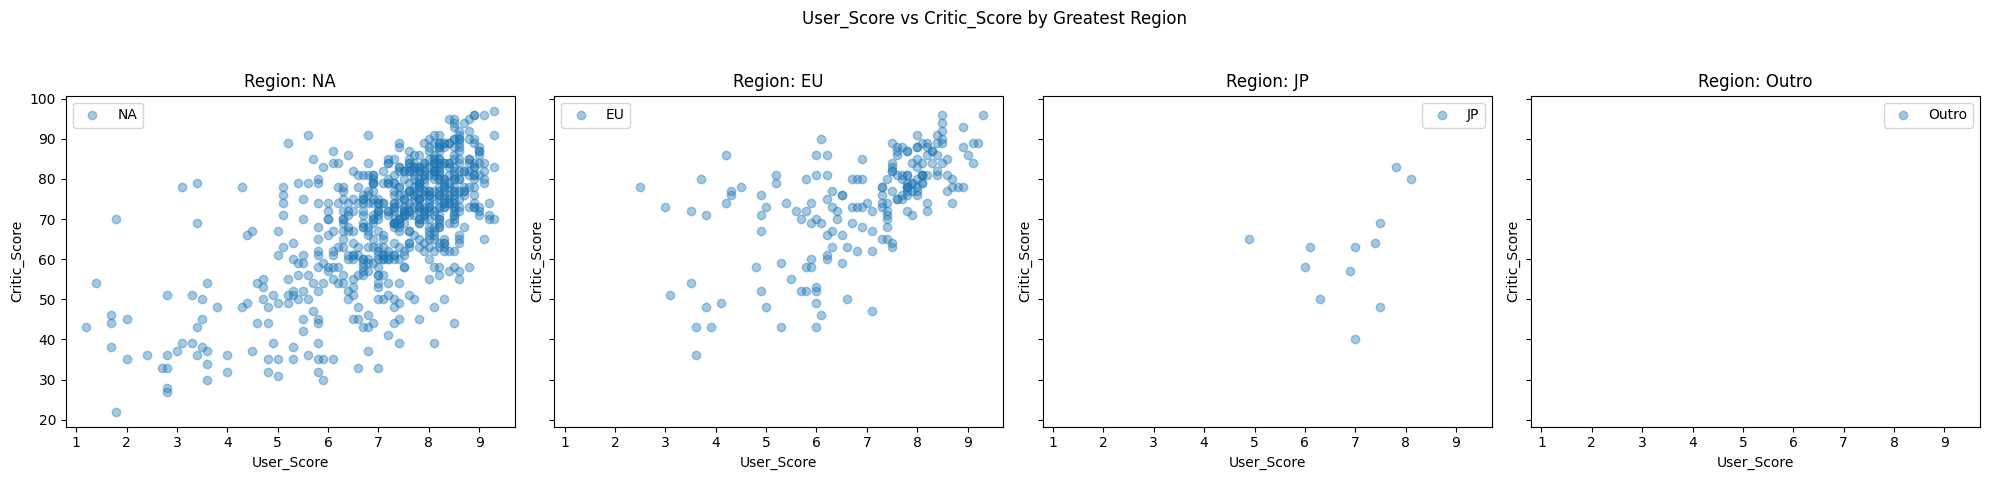

In [11]:
df_fi = df[df["Global_Sales"] > 0]
df_fi = df_fi[df_fi["Critic_Score"] > 0]

# Plot settings
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle("User_Score vs Critic_Score by Greatest Region")

for i, region in enumerate(["NA", "EU", "JP", "Outro"]):
    ax = axes[i]

    filtered_df = df_fi[df_fi["Greatest"] == region]

    filtered_df = filtered_df[ filtered_df[ "Genre" ] == "Shooter"  ]

    ax.scatter(
        filtered_df["User_Score"], 
        filtered_df["Critic_Score"], 
        label=region, alpha=0.4
    )
    ax.set_title(f"Region: {region}")
    ax.set_xlabel("User_Score")
    ax.set_ylabel("Critic_Score")
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

In [12]:
# Transforma colunas categóricas em valores numéricos
# necessários para utilização de árvore de decisão

# df["Publisher"] = df["Publisher"].fillna("NA").astype('category').cat.codes
# df["Platform"]  = df["Platform"].fillna("NA").astype('category').cat.codes
# df["Genre"]     = df["Genre"].fillna("NA").astype('category').cat.codes
# df["Developer"] = df["Developer"].fillna("NA").astype('category').cat.codes
# df["Greatest"]  = df["Greatest"].astype('category').cat.codes
# df["Rating"]    = df["Rating"].astype('category').cat.codes

# Preenche os NAs com 0
df["Critic_Score"] = df["Critic_Score"].fillna(0)
df["Critic_Count"] = df["Critic_Count"].fillna(0)

# df = df.dropna()

df['Critic_Classification'] = pd.cut(df['Critic_Score'], bins=10, labels=[x for x in range(0, 10)] )
df['Critic_Count_Classification'] = pd.cut(df['Critic_Count'], bins=4, labels=[1, 2, 3, 4])

# df.fillna("NA")
df["Year_of_Release"] = df["Year_of_Release"].fillna(2000);

print( df[["Critic_Score", "Critic_Classification"]] )


       Critic_Score Critic_Classification
335            85.0                     8
336            91.0                     9
337            88.0                     8
338            81.0                     8
339             0.0                     0
...             ...                   ...
16714           0.0                     0
16715           0.0                     0
16716           0.0                     0
16717           0.0                     0
16718           0.0                     0

[16384 rows x 2 columns]


In [23]:
# print(df.iloc[0:10][["Name", "Global_Sales", "Platform"]])

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Greatest,Critic_Classification,Critic_Count_Classification
335,Super Paper Mario,Wii,2007.0,Platform,Nintendo,1.95,0.86,0.59,0.31,3.71,85.0,56.0,7.9,417.0,Intelligent Systems,E,NA,8,3
336,Spyro: Year of the Dragon,PS,2000.0,Platform,Sony Computer Entertainment,1.93,1.58,0.00,0.19,3.71,91.0,15.0,8.8,207.0,Insomniac Games,E,NA,9,1
337,Assassin's Creed IV: Black Flag,PS3,2013.0,Action,Ubisoft,1.33,1.68,0.13,0.57,3.71,88.0,36.0,8.1,840.0,Ubisoft,M,EU,8,2
338,FIFA Soccer 2005,PS2,2004.0,Sports,Electronic Arts,0.58,2.48,0.04,0.59,3.70,81.0,27.0,7.6,56.0,EA Canada,E,EU,8,2
339,Pokémon Trading Card Game,GB,1998.0,Strategy,Nintendo,1.49,0.73,1.38,0.10,3.70,0.0,0.0,NaN,NaN,NaN,NaN,NA,0,1
